Two 5-dimensional Unimodal Gaussian Classes.
100 batches of 1900 instances



METHOD: Static knn as classifier
Execution time:  125.7726843725642
Average MCC:  0.374207068256
Average macro-F1: 0.6680122546887115
Average Accuracy:  69.0301
Standard Deviation:  21.5396584232
Variance:  463.95688499


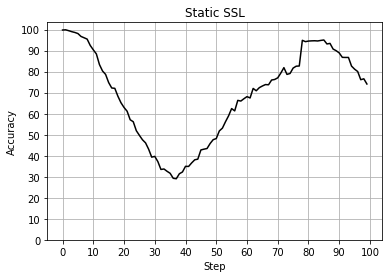

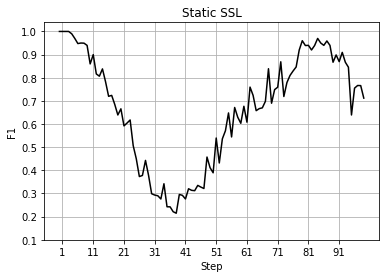




METHOD: Sliding knn as classifier


C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:516: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(var_yt * var_yp)


Execution time:  12.43591952899105
Average MCC:  0.613202796893
Average macro-F1: 0.7549708945059401
Average Accuracy:  79.8977
Standard Deviation:  19.4753759324
Variance:  379.29026771


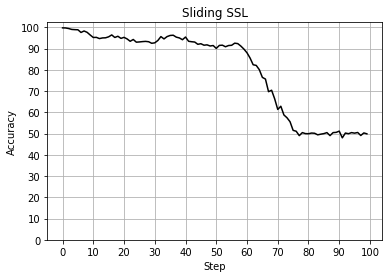

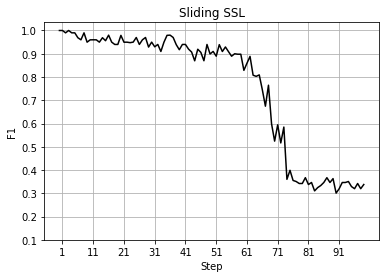




METHOD: Incremental knn as classifier
Execution time:  763.1867016533748
Average MCC:  0.40459770566
Average macro-F1: 0.6782636953387957
Average Accuracy:  69.3815
Standard Deviation:  18.8716946444
Variance:  356.14085875


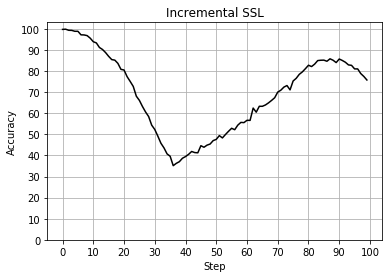

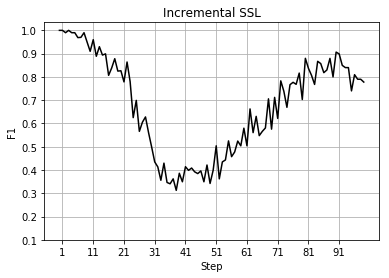




METHOD: knn as classifier and kde as core support extraction with cutting data method
Execution time:  50.78092655517207
Average MCC:  0.835879287063
Average macro-F1: 0.9151602043989746
Average Accuracy:  91.7937
Standard Deviation:  6.15591449827
Variance:  37.89528331


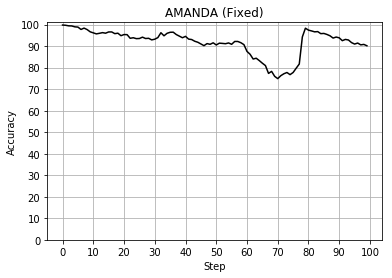

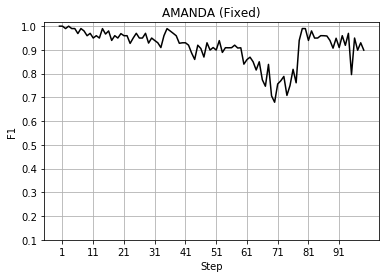




METHOD: knn as classifier and kde and Hellinger distance as dynamic CSE
Execution time:  34.35783193026987
Average MCC:  0.83273257359
Average macro-F1: 0.9129829679334875
Average Accuracy:  91.4773
Standard Deviation:  6.47449887713
Variance:  41.91913571


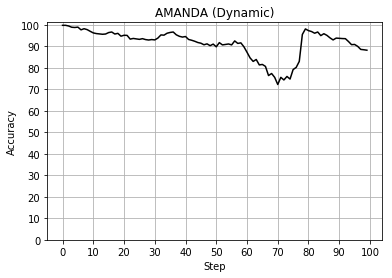

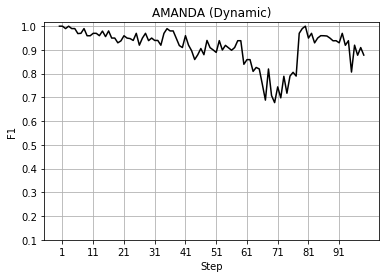




METHOD: None as classifier and GMM with BIC and Mahalanobis as core support extraction
gmmWithBIC: Error to choose the best GMM model
'NoneType' object has no attribute 'precisions_'
Method: Level IW
Execution time:  34.35783193026987
Average MCC:  0.00846440678253
Average macro-F1: 0.5019007957521722
Average Accuracy:  79.18316
Standard Deviation:  20.2756560349
Variance:  411.102227645


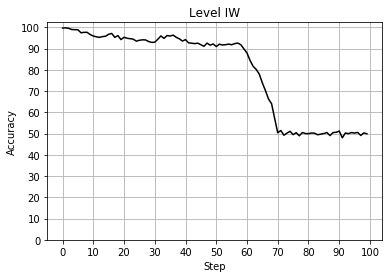

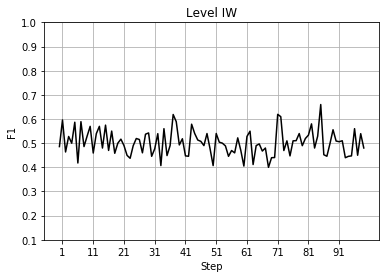

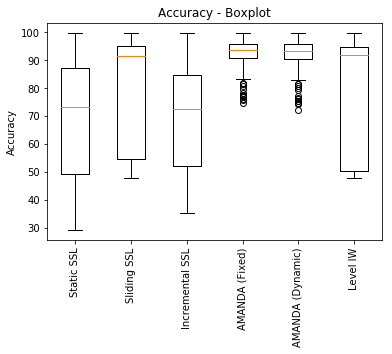

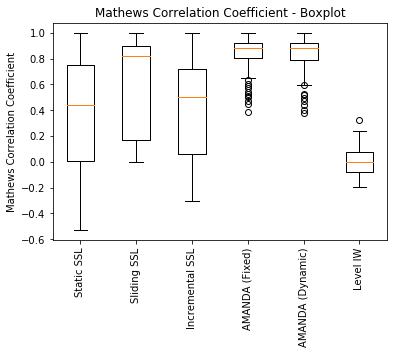

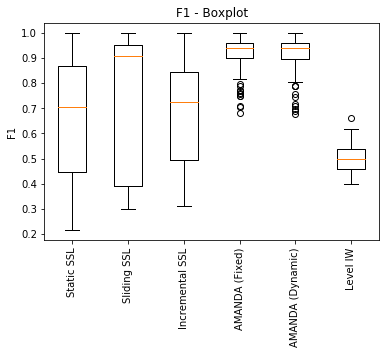

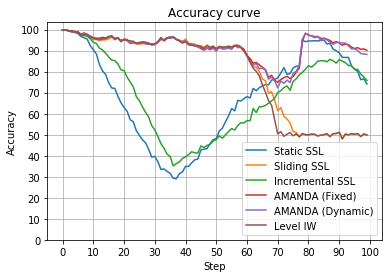

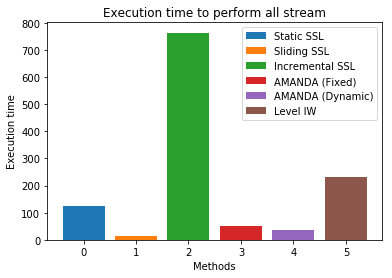

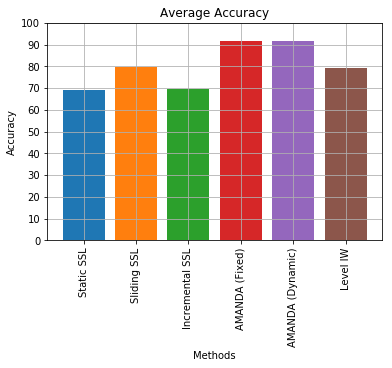

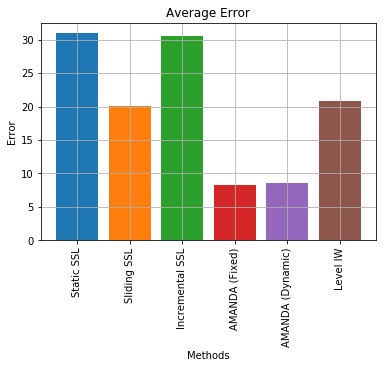

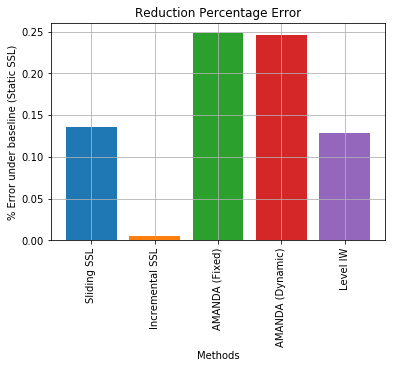

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'knn' # lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = True
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.loadUG_2C_5D(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 11, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 11, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 11, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 11, 0.75, "kde", sslClassifier)

    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    experiments[4] = Experiment(amanda_dynamic, 11, None, "kde", sslClassifier)

    # COMPOSE GMM (Python version)
    experiments[5] = Experiment(compose_gmm_version, 11)
    
    # levelIw matlab results
    predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, 'UG_2C_5D', steps)
    externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()